# **Education and Economy Data Analysis**


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

## Import data

In [5]:
data = pd.read_csv('data/education-economy-data.csv')
data.head()

,Country,Literacy Rate,Physician Density,GDP (Current USD),GDP Growth (% Annual),GDP per Capita (Current USD),GDP per Capita Category,Unemployment Rate (%),Continent
0,Afghanistan,43.0,0.28,1.723305e+10,2.710887,415.707417,Very Low,13.991,Asia
1,Albania,98.1,1.20,2.354718e+10,3.936625,8575.171134,Mid,10.108,Europe
2,Algeria,81.4,1.72,2.476260e+11,4.100000,5364.027950,Low,11.701,Africa
3,Andorra,100.0,3.33,3.785067e+09,2.583555,46812.448450,High,3.700,Europe
4,Angola,71.1,0.21,8.482465e+10,1.001289,2308.159767,Low,14.537,Africa


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       191 non-null    object 
 1   Literacy Rate                 191 non-null    float64
 2   Physician Density             191 non-null    float64
 3   GDP (Current USD)             191 non-null    float64
 4   GDP Growth (% Annual)         191 non-null    float64
 5   GDP per Capita (Current USD)  191 non-null    float64
 6   GDP per Capita Category       191 non-null    object 
 7   Unemployment Rate (%)         191 non-null    float64
 8   Continent                     191 non-null    object 
dtypes: float64(6), object(3)
memory usage: 13.6+ KB


No missing columns and rows from info

In [7]:
data.describe()

,Literacy Rate,Physician Density,GDP (Current USD),GDP Growth (% Annual),GDP per Capita (Current USD),Unemployment Rate (%)
count,191.000000,191.000000,1.910000e+02,191.000000,191.000000,191.000000
mean,86.994764,1.848639,5.427605e+11,2.666018,18796.795066,7.522831
std,17.622097,1.679639,2.452696e+12,4.362681,30535.286667,7.092726
min,26.800000,0.010000,6.228031e+07,-20.111576,193.007146,0.130000
25%,81.800000,0.345000,1.356848e+10,0.979868,2284.223590,3.139500
50%,95.600000,1.470000,4.260088e+10,2.733798,6947.359287,5.264000
75%,99.000000,2.950000,2.651225e+11,4.987486,22322.354985,9.027000
max,100.000000,8.420000,2.772070e+13,33.802617,256580.515100,50.000000


## Explore distributions and visualizations

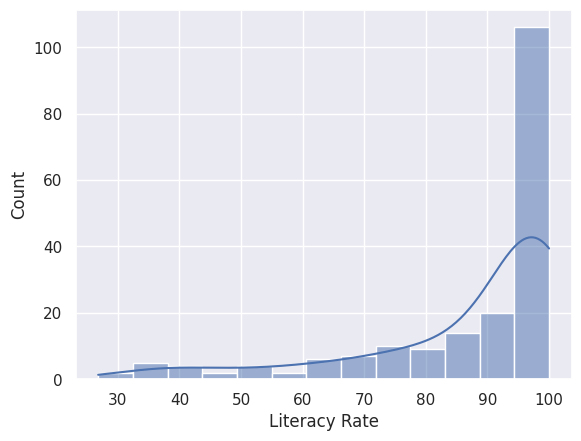

In [8]:
sns.histplot(data['Literacy Rate'],kde=True)
plt.show()

Based on the histogram, the data for 'Literacy Rate' appears to be heavily skewed toward the higher end. The majority of the data points are concentrated in the 95-100 literacy rate bin, with a count of over 100. This suggests that in the dataset, most of the entities (likely countries) have a very high literacy rate. The distribution also shows a long tail extending to the left, indicating that fewer entities have lower literacy rates. The kernel density estimate (KDE) curve, which smooths the histogram bars, reinforces this observation with a steep rise to a peak between 95 and 100, followed by a gradual decline towards the lower literacy rates.

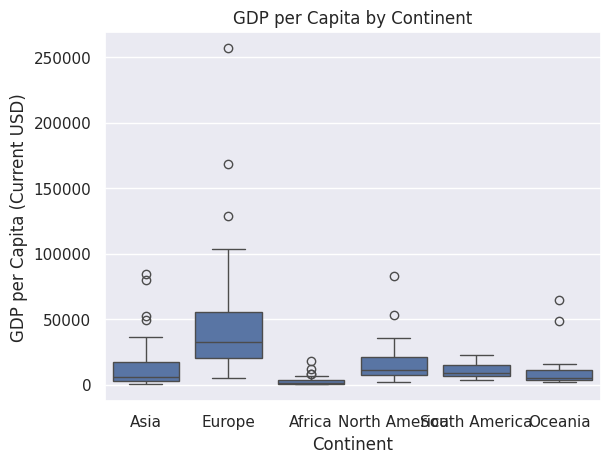

In [9]:
sns.boxplot(y=data['GDP per Capita (Current USD)'],x=data['Continent'])
plt.title("GDP per Capita by Continent")
plt.show()

Europe has the highest median GDP per capita among all continents, and it also has the largest spread of data, with many outliers, some with very high GDP per capita.

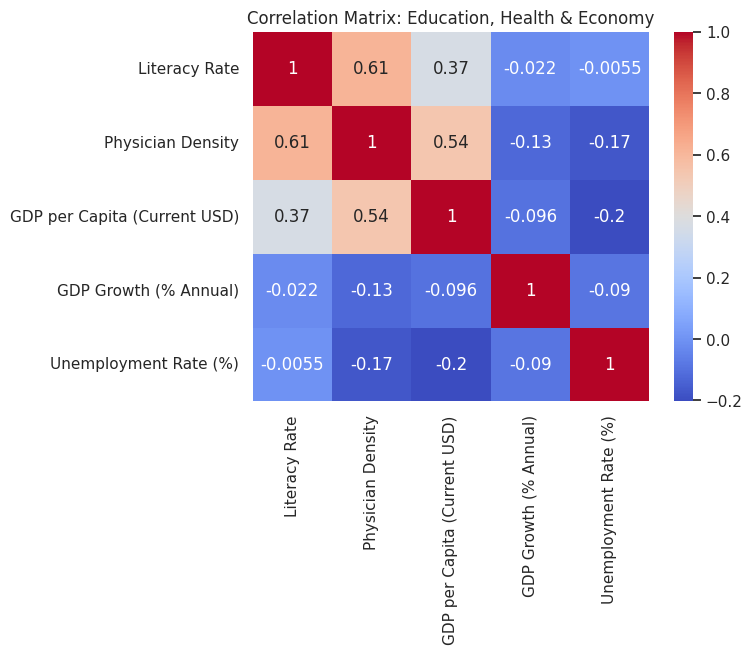

In [10]:
corr = data[['Literacy Rate', 'Physician Density', 'GDP per Capita (Current USD)','GDP Growth (% Annual)', 'Unemployment Rate (%)']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix: Education, Health & Economy")
plt.show()

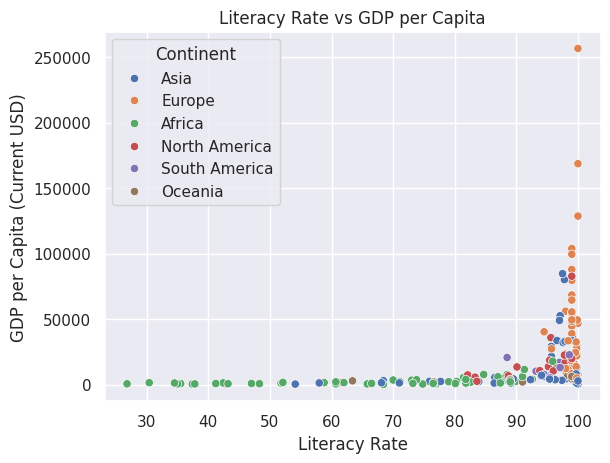

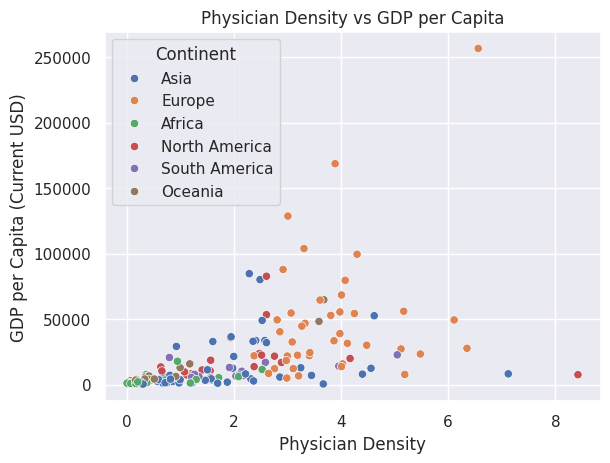

In [11]:
sns.scatterplot(x='Literacy Rate', y='GDP per Capita (Current USD)', hue='Continent', data=data)
plt.title("Literacy Rate vs GDP per Capita")
plt.show()

sns.scatterplot(x='Physician Density', y='GDP per Capita (Current USD)', hue='Continent', data=data)
plt.title("Physician Density vs GDP per Capita")
plt.show()

The relationship between literacy and economic output is positive but nonlinear. High literacy is a foundational driver of GDP per capita, yet beyond a certain point, additional literacy gains yield diminishing economic returns, emphasizing the importance of broader structural and technological development.

Text(0.5, 1.0, 'Unemployment Rate vs GDP per Capita')

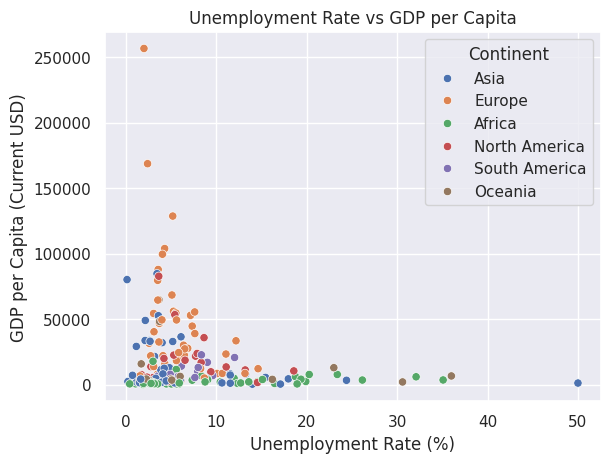

In [15]:
sns.scatterplot(x='Unemployment Rate (%)', y='GDP per Capita (Current USD)', hue='Continent', data=data)
plt.title("Unemployment Rate vs GDP per Capita")

## conclusion

Countries with higher literacy rates consistently show higher GDP per capita, confirming that education fuels economic capacity. However, the relationship is nonlinear — once literacy surpasses ~90%, GDP gains taper off, suggesting that after achieving basic education, innovation, governance, and technology become key growth drivers.

high-income nations generally have lower unemployment, though not always